In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('krasnogorsk.csv', sep=';', encoding= 'unicode_escape')

In [3]:
df = df.iloc[:, -4:]

In [4]:
df['ns1:time2'] = pd.to_datetime(df['ns1:time2'])

In [5]:
df['time_delta'] = (df['ns1:time2']-df['ns1:time2'].shift()).fillna(pd.Timedelta(seconds=0))
df['training_time'] = df['ns1:time2'] - df['ns1:time2'][0]
df['ns1:ele'] = df['ns1:ele'].str.replace(',', '.').astype(float)

In [54]:
from string import Template

class DeltaTemplate(Template):
    delimiter = "%"

def strfdelta(tdelta, fmt):
    d = {"D": tdelta.days}
    hours, rem = divmod(tdelta.seconds, 3600)
    minutes, seconds = divmod(rem, 60)
    d["H"] = '{:02d}'.format(hours)
    d["M"] = '{:02d}'.format(minutes)
    d["S"] = '{:02d}'.format(seconds)
    t = DeltaTemplate(fmt)
    return t.substitute(**d)

df['time'] = df.index * pd.Timedelta(seconds=4)
df['time'] = df['time'].apply(lambda x: strfdelta(x, '%H:%M:%S'))
# df['time'] = df['time'].apply(lambda x: x.strftime('%H:%M:%S'))

In [56]:
df[['time', 'ns1:ele', 'ns2:hr', 'ns2:cad']][:1500].to_csv('krasnogorsk-parse.csv', index=False, date_format='%H:%M:%S')

C:\Users\Pro18\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Pro18\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Pro18\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


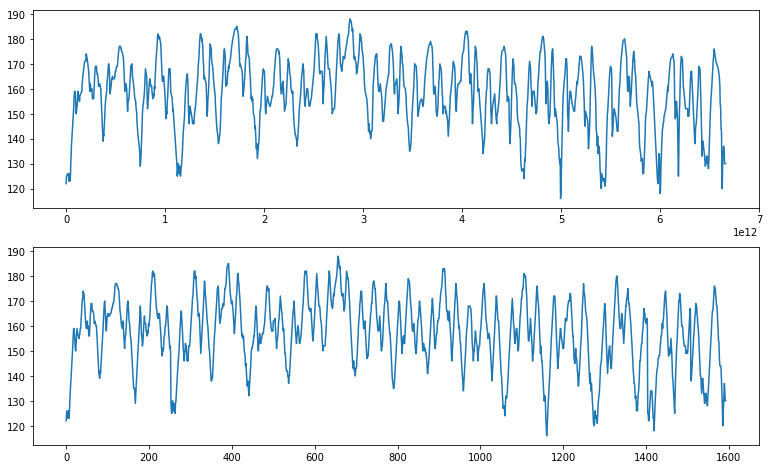

In [12]:
plt.figure(figsize=(13, 8))
plt.subplot(211)
plt.plot(df['training_time'], df['ns2:hr'])
plt.subplot(212)
plt.plot(df['ns2:hr'])